In [29]:
import sympy
from sympy import Rational as R
import numpy as np
import matplotlib.pyplot as plt

In [14]:
reference_x, physical_x_0, physical_x_1 = sympy.symbols("x x_0 x_1")

In [15]:
monomial_basis = sympy.Matrix([1, reference_x])

In [16]:
Vander = sympy.zeros(2, 2)

In [17]:
for i, basis in enumerate(monomial_basis):
    Vander[i, 0] = basis.subs({reference_x: 0})
    Vander[i, 1] = basis.subs({reference_x: 1})

In [18]:
p1_basis = Vander.inv()@monomial_basis

In [19]:
mapping_function = physical_x_0*p1_basis[0] + physical_x_1*p1_basis[1]

In [84]:
kv = {physical_x_0: 0, physical_x_1: 1}
t = np.linspace(0, 1, 100)
x = np.zeros_like(t)
y = np.zeros_like(t)

x[:] = sympy.lambdify(reference_x, mapping_function.subs(kv).subs({reference_x: reference_x**2}))(t)
y[:] = sympy.lambdify(reference_x, (p1_basis[0]*0 + p1_basis[1]*1).diff(reference_x)*mapping_function.subs(kv).subs({reference_x: reference_x**2}).diff(reference_x).subs(kv))(t)

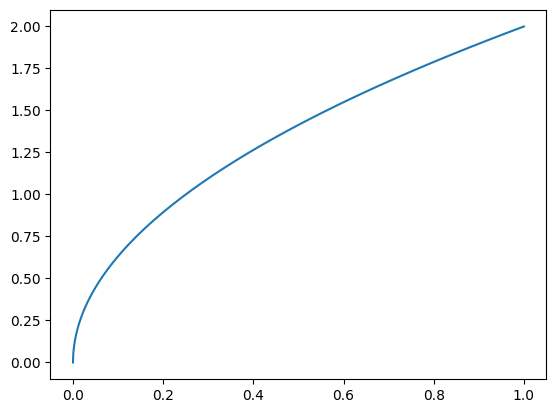

In [85]:
plt.plot(x, y)